Sean Moiselle 17461824 
Zaur Gouliev 18718545

# Task 3: MST using Prim's algorithm

*accompanying file Task3_Explination.pdf*

## This is simply a dictionary to store the all of the values of the graph

In [2]:
mapp = {
    1: {2: 240, 3: 210, 4: 340, 5: 280, 6: 200, 7: 345, 8: 120},
    2: {3: 265, 4: 175, 5: 215, 6: 180, 7: 185, 8: 155},
    3: {4: 260, 5: 115, 6: 350, 7: 435, 8: 195},
    4: {5: 160, 6: 330, 7: 295, 8: 230},
    5: {6: 360, 7: 400, 8:170},
    6: {7: 175, 8: 205},
    7: {8: 305},
    8: {}
}

#TO CHECK FOR ERRORS
#for key, value in mapp.items():
#    for inner_key, inner_value in value.items():
#        print(key + " " + inner_key + ": "+ str(mapp[key][inner_key]) + " " + str(mapp[inner_key][key]))

## networkx graph

The graph is constructed using networkx libraries and the data above

In [3]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import sys
G = nx.Graph()

for key in mapp.keys():
    G.add_node(key)
    
to_add = []
for key, val in mapp.items():
    for in_key, in_val in val.items():
        to_add.append((key, in_key, in_val))

        
G.add_weighted_edges_from(to_add)

nx.info(G)

C:\Users\Zaurg\AppData\Local\Temp/ipykernel_21748/1694382460.py:18: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 8 nodes and 28 edges'

# Graphing the network

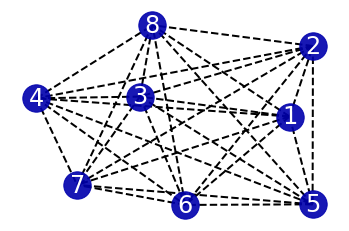

In [4]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 750, alpha = 0.9, node_color = '#0000ac')
nx.draw_networkx_edges(G, pos, 
                       width = 2, alpha = 1, edge_color = 'k', style = 'dashed')
nx.draw_networkx_labels(G, pos, font_size = 24, font_color = 'white')
limits = plt.axis('off')

## MST
This uses the minimum_spanning_edges method of the networkx libraries tree to find the shortest paths to each node from A
We pass in the parameter of the algorithm to be set to prim so that it uses the prim's algorithm

In [5]:
from networkx.algorithms import tree

mst = tree.minimum_spanning_edges(G, algorithm="prim", data=False)
mst_list = list(mst)    

print(mst_list)

[(1, 8), (8, 2), (8, 5), (5, 3), (5, 4), (2, 6), (6, 7)]


## Remove edges that aren't being used

In [6]:
for start_node, end_node in list(G.edges()):
       if (start_node, end_node) not in mst_list and (end_node, start_node) not in mst_list:
            G.remove_edge(start_node, end_node)
            
nx.info(G)

C:\Users\Zaurg\AppData\Local\Temp/ipykernel_21748/743099451.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 8 nodes and 7 edges'

## Graphing the updated Graph

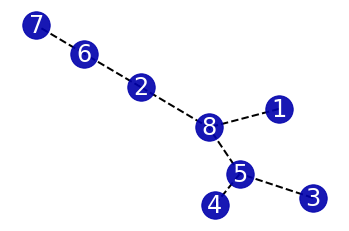

In [7]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 750, alpha = 0.9, node_color = '#0000ac')
nx.draw_networkx_edges(G, pos, 
                       width = 2, alpha = 1, edge_color = 'k', style = 'dashed')
nx.draw_networkx_labels(G, pos, font_size = 24, font_color = 'white')
limits = plt.axis('off')

# Analysis

Prims algorithm falls under the umbrella of graph theory, it locates a minimum spanning tree for a conencted weight graph (Sudhakar & Srinivas, 2011; Manen, Guillaumin & Van Gool, 2013). Prims algorithm creates a minimum spanning tree through the process of utilizing sequentially expanding subtrees, 'the initial subtree in such a sequence consits of a single vertex selected arbitrarily from the set of V of a graph's vertices' (Sudhakar & Srinivas, 2011 p.13).

Following the initial subtree, prims algorithm expands by attaching the nearest vertex which is not currently in the tree (Sudhakar & Srinivas, 2011). These steps were displayed in both our 'Hand drawn' prims algorithm and our programmed one above. The algorithm eventually stops upon the inclusion of all vertices into the tree. As a result of the process which Prims algorithm uses the total number of iterations will always be *n - 1* where n represents the number of vertices in the graph. This is displayed in our own implementation where there were 8 - 1 steps (Sudhakar & Srinivas, 2011). 

Prims algorithm holds a time complexity of O((V + E)LogV) as a result of inserting each node or vertex into the queue only once, and the insertion of the priority queue taking logarithmic time ("Minimum Spanning Tree Tutorials & Notes | Algorithms | HackerEarth", n.d.). 

Finally there are a number of requirements for Prims algorithm such as the necessity to provide infomation about the shortest edge connecting a vertex to a tree, vertices which are not yet adjecent to any of the tree are provided the infinit symbol(Sudhakar & Srinivas, 2011). 


# References

Sudhakar, T., & Srinivas, K. (2011). Power System Reconfiguration Based on Prims Algorithm. IEEE.

Manen, S., Guillaumin, M., & Van Gool, L. (2013). Prime Object Proposals with Randomized Prim’s Algorithm. IEEE.

Minimum Spanning Tree Tutorials & Notes | Algorithms | HackerEarth. Retrieved 25 April 2022, from https://www.hackerearth.com/practice/algorithms/graphs/minimum-spanning-tree/tutorial/#:~:text=The%20time%20complexity%20of%20the,priority%20queue%20take%20logarithmic%20time.